In [8]:
import pandas as pd
from pathlib import Path
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import hvplot.pandas

In [9]:
amz_data= ("../FinTECH/Project-1-Team-2/amz_gf.csv")
msft_data= ("../FinTECH/Project-1-Team-2/msft_gf.csv")
aapl_data= ("../FinTECH/Project-1-Team-2/aapl_gf.csv")

In [10]:
ticker_path  =[amz_data,msft_data,aapl_data]

In [11]:
def tech_stoc(ticker_path:list):
    amz = pd.read_csv(ticker_path[0],index_col='Date',infer_datetime_format=True)
    msft = pd.read_csv(ticker_path[1],index_col='Date',infer_datetime_format=True)
    aapl = pd.read_csv(ticker_path[2],index_col='Date',infer_datetime_format=True)
    tech_price = pd.concat([amz,msft,aapl],join='inner',axis=1) 
        
    return tech_price
    

In [12]:
tech_price=tech_stoc(ticker_path)
tech_price.columns=['AMZN','MSFT','AAPL']
tech_price.sort_index(inplace=False)


,AMZN,MSFT,AAPL
Date,,,
1/10/2019 16:00:00,82.81,103.60,38.45
1/10/2020 16:00:00,94.16,161.34,77.58
1/10/2022 16:00:00,161.49,314.27,172.19
1/10/2023 16:00:00,89.87,228.85,130.73
1/11/2019 16:00:00,82.03,102.80,38.07
...,...,...,...
9/8/2023 16:00:00,138.23,334.27,178.18
9/9/2019 16:00:00,91.57,137.52,53.54
9/9/2020 16:00:00,163.43,211.29,117.32


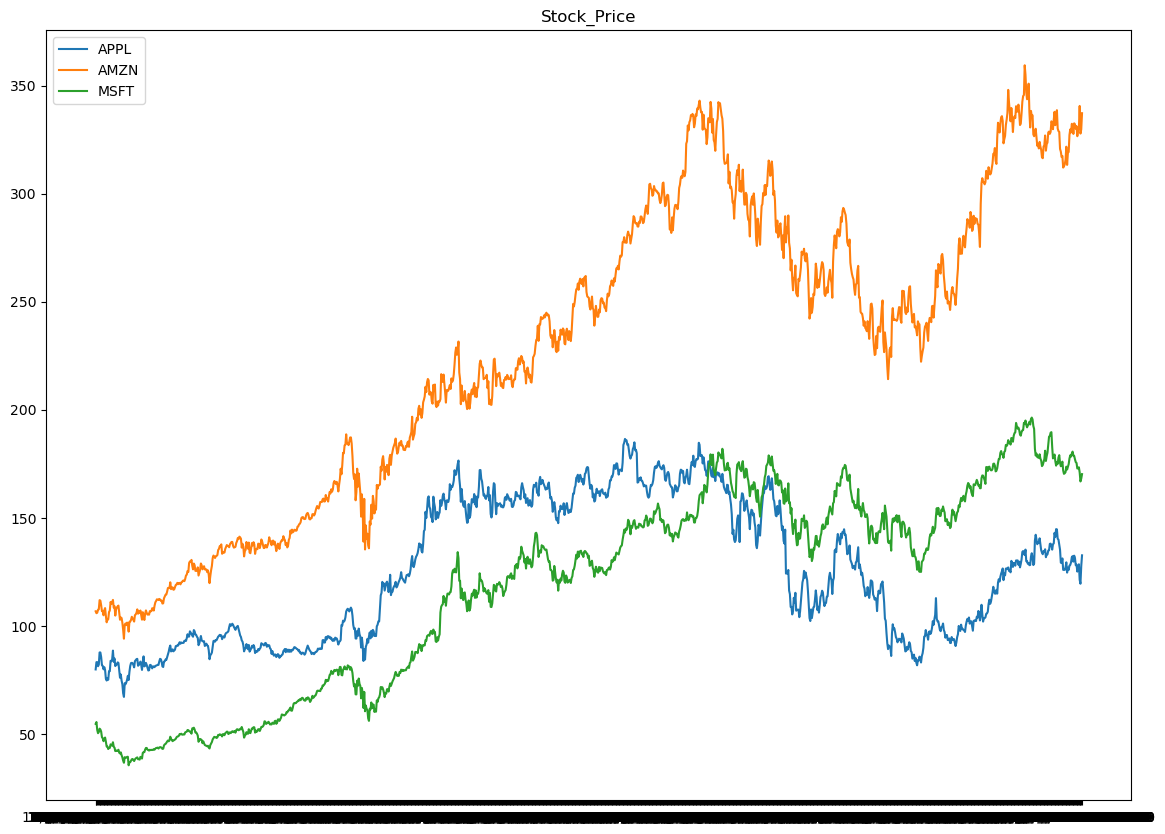

In [13]:
plt.figure(figsize=(14,10))
plt.plot(tech_price)
plt.xlabel(xlabel=None)
plt.title('Stock_Price')
plt.legend(['APPL','AMZN','MSFT'], loc='upper left')
plt.show()


<Axes: xlabel='Date'>

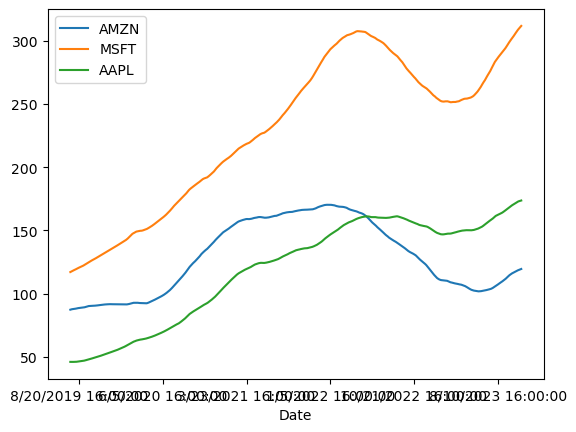

In [14]:
tech_price.rolling(window=180).mean().plot()

<Axes: xlabel='Date'>

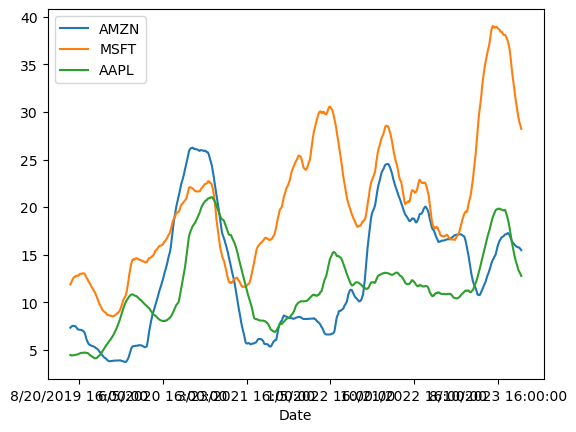

In [15]:
tech_price.rolling(window=180).std().plot()

<Axes: xlabel='Date'>

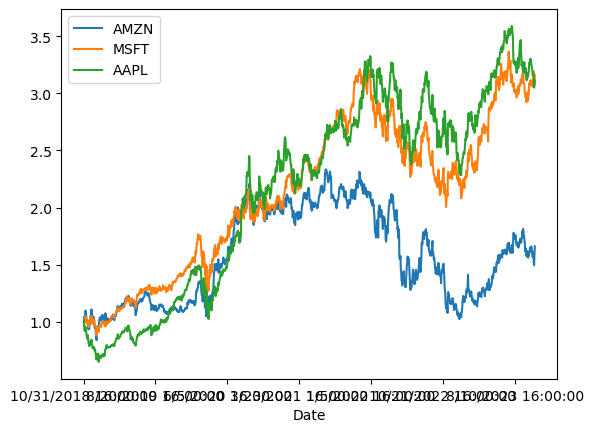

In [16]:
tech_dail= tech_price.pct_change()
tech_cum=(1+tech_dail).cumprod()
tech_cum.plot()

In [17]:
ticker_list = ['DELL','UBER', 'INTC']

In [18]:
def stock_data(ticker_list:list):
    data = yf.Tickers(ticker_list)
    stock_prices = data.history(period='5y',actions=False)
    prices = stock_prices['Close']
    tech_comp = {}
  
    return prices,pd.DataFrame(tech_comp)

In [19]:
tech_comp, price = stock_data(ticker_list)

[*********************100%%**********************]  3 of 3 completed


In [20]:
tech_comp.head()

,DELL,INTC,UBER
Date,,,
2018-11-14,28.113888,41.069416,NaN
2018-11-15,27.946301,41.959011,NaN
2018-11-16,27.789360,42.586956,NaN
2018-11-19,27.478136,41.863075,NaN
2018-11-20,27.302572,41.331070,NaN


<Axes: xlabel='Date'>

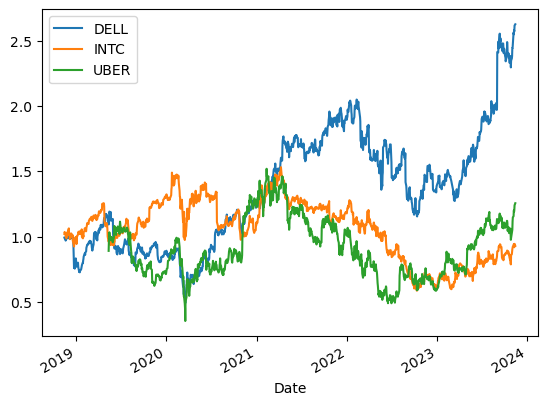

In [21]:
tech_rivals=tech_comp.pct_change()
tech_rival_cum=(1+tech_rivals).cumprod()
tech_rival_cum.plot()

<Axes: xlabel='Date'>

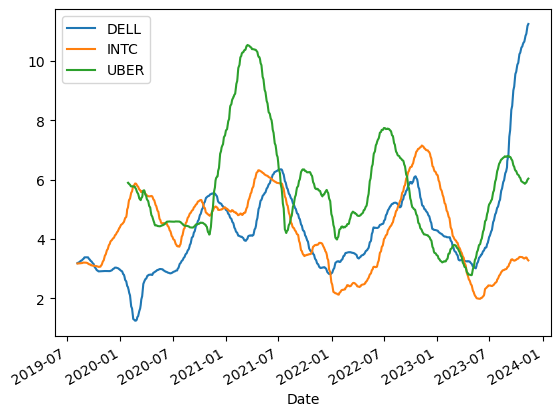

In [22]:
tech_comp.rolling(window=180).std().plot()

<Axes: xlabel='Date'>

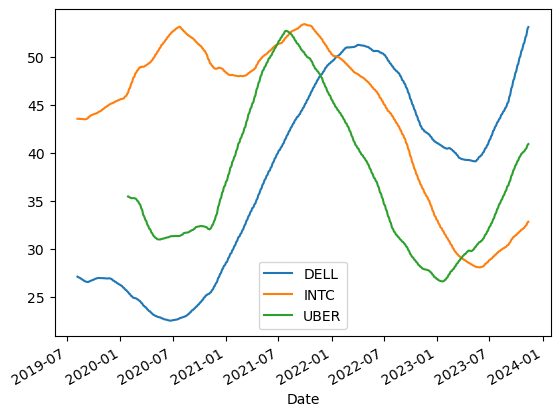

In [23]:
tech_comp.rolling(window=180).mean().plot()